In [ ]:
#| include: false
#| default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.motif.draw import *
from glycowork.motif.analysis import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
from glycowork.motif.processing import *
from glycowork.motif.regex import *
from glycowork.motif.query import *
from glycowork.motif.tokenization import *
from glycowork.glycan_data.loader import df_species, glycomics_data_loader, lectin_array_data_loader, glycoproteomics_data_loader

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `draw` contains the GlycoDraw function to draw glycans in SNFG style
- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains functions to process IUPAC-condensed glycan sequences, as well as conversion functions to convert other nomenclatures into IUPAC-condensed.
- `regex` contains functionality for performing powerful regular expression-like searches on glycans; `get_match` is the user-facing function.
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map _m/z_-->composition, composition-->structure, structure-->motif, and more

## draw
 >drawing glycans in SNFG style

In [ ]:
show_doc(GlycoDraw)

---

### GlycoDraw

>      GlycoDraw (draw_this, vertical=False, compact=False, show_linkage=True,
>                 dim=50, highlight_motif=None, highlight_termini_list=[],
>                 repeat=None, repeat_range=None, draw_method=None,
>                 filepath=None, suppress=False, per_residue=[])

Draws a glycan structure based on the provided input.

| Arguments:
| :-
| draw_this (string): The glycan structure or motif to be drawn.
| vertical (bool, optional): Set to True to draw the structure vertically. Default: False.
| compact (bool, optional): Set to True to draw the structure in a compact form. Default: False.
| show_linkage (bool, optional): Set to False to hide the linkage information. Default: True.
| dim (int, optional): The dimension (size) of the individual sugar units in the structure. Default: 50.
| highlight_motif (string, optional): Glycan motif to highlight within the parent structure.
| highlight_termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')
| repeat (bool | int | str): If specified, indicate repeat unit by brackets (True: n units, int: # of units, str: range of units)
| repeat_range (list of 2 int): List of index integers for the first and last main-chain monosaccharide in repeating unit. Monosaccharides are numbered starting from 0 (invisible placeholder = 0 in case of structure terminating in a linkage) at the reducing end.
| draw_method (string, optional): Specify 'chem2d' or 'chem3d' to draw chemical structures; default:None (SNFG figure)
| filepath (string, optional): The path to the output file to save as SVG or PDF when drawing SNFG/chem2d figures or PDB when generating 3D conformers. Default: None.
| suppress (bool, optional): Whether to suppress the visual display of drawings into the console; default:False
| per_residue (list, optional): list of floats (order should be the same as the monosaccharides in glycan string) to quantitatively highlight monosaccharides.

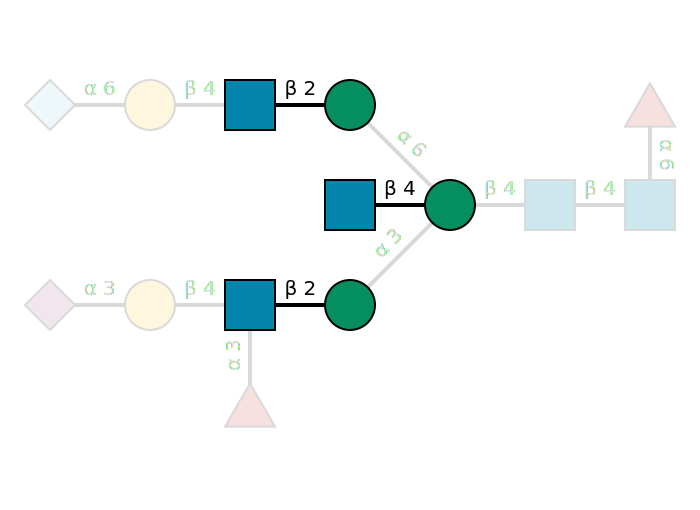

In [ ]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
         highlight_motif = "GlcNAc(b1-?)Man")

In [ ]:
show_doc(annotate_figure)

---

### annotate_figure

>      annotate_figure (svg_input, scale_range=(25, 80), compact=False,
>                       glycan_size='medium', filepath='', scale_by_DE_res=None,
>                       x_thresh=1, y_thresh=0.05, x_metric='Log2FC')

Modify matplotlib svg figure to replace text labels with glycan figures

| Arguments:
| :-
| svg_input (string): absolute path including full filename for input svg figure
| scale_range (tuple): tuple of two integers defining min/max glycan dim; default:(25,80)
| compact (bool): if True, draw compact glycan figures; default:False
| glycan_size (string): modify glycan size; default:'medium'; options are 'small', 'medium', 'large'
| filepath (string): absolute path including full filename allows for saving the plot
| scale_by_DE_res (df): result table from motif_analysis.get_differential_expression. Include to scale glycan figure size by -10logp
| x_thresh (float): absolute x metric threshold for datapoints included for scaling, set to match get_differential_expression; default:1.0
| y_thresh (float): corr p threshhold for datapoints included for scaling, set to match get_differential_expression; default:0.05
| x_metric (string): x-axis metric; default:'Log2FC'; options are 'Log2FC', 'Effect size'

| Returns:
| :-
| Modified figure svg code

In [ ]:
show_doc(plot_glycans_excel)

---

### plot_glycans_excel

>      plot_glycans_excel (df, folder_filepath, glycan_col_num=0,
>                          scaling_factor=0.2, compact=False)

plots SNFG images of glycans into new column in df and saves df as Excel file

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences [alternative: filepath to .csv or .xlsx]
| folder_filepath (string): full filepath to the folder you want to save the output to
| glycan_col_num (int): index of the column containing glycan sequences; default:0 (first column)
| scaling_factor (float): how large the glycans should be; default:0.2
| compact (bool, optional): Set to True to draw the structures in a compact form. Default: False.

| Returns:
| :-
| Saves the dataframe with glycan images as output.xlsx into folder_filepath

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

---

### get_pvals_motifs

>      get_pvals_motifs (df, glycan_col_name='glycan', label_col_name='target',
>                        zscores=True, thresh=1.645, sorting=True,
>                        feature_set=['exhaustive'], multiple_samples=False,
>                        motifs=None, custom_motifs=[])

returns enriched motifs based on label data or predicted data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences and labels [alternative: filepath to .csv or .xlsx]
| glycan_col_name (string): column name for glycan sequences; arbitrary if multiple_samples = True; default:'glycan'
| label_col_name (string): column name for labels; arbitrary if multiple_samples = True; default:'target'
| zscores (bool): whether data are presented as z-scores or not, will be z-score transformed if False; default:True
| thresh (float): threshold value to separate positive/negative; default is 1.645 for Z-scores
| sorting (bool): whether p-value dataframe should be sorted ascendingly; default: True
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),     |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),     |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),     |   and 'chemical' (molecular properties of glycan)
| multiple_samples (bool): set to True if you have multiple samples (rows) with glycan information (columns); default:False
| motifs (dataframe): can be used to pass a modified motif_list to the function; default:None
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty

| Returns:
| :-
| Returns dataframe with p-values, corrected p-values, and Cohen's d as effect size for every glycan motif

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,motif,pval,corr_pval,effect_size
4,GlcNAc,0.038120,0.205849,1.530905
8,Man,0.054356,0.234990,1.390253
24,Man(a1-?)Man,0.060923,0.234990,1.308333
22,Man(a1-3)Man,0.034212,0.205849,1.196586
14,GlcNAc(b1-4)GlcNAc,0.019543,0.175885,1.168815
23,Man(a1-6)Man,0.019543,0.175885,1.168815
25,Man(b1-4)GlcNAc,0.019543,0.175885,1.168815
7,Kdo,0.328790,0.479672,-0.811679
2,Glc,0.644180,0.668956,-0.811679
21,Man(a1-2)Man,0.177461,0.479672,0.772320


In [ ]:
show_doc(get_representative_substructures)

---

### get_representative_substructures

>      get_representative_substructures (enrichment_df)

builds minimal glycans that contain enriched motifs from get_pvals_motifs

| Arguments:
| :-
| enrichment_df (dataframe): output from get_pvals_motifs

| Returns:
| :-
| Returns up to 10 minimal glycans in a list

In [ ]:
show_doc(get_heatmap)

---

### get_heatmap

>      get_heatmap (df, motifs=False, feature_set=['known'], transform='',
>                   datatype='response', rarity_filter=0.05, filepath='',
>                   index_col='glycan', custom_motifs=[], return_plot=False,
>                   **kwargs)

clusters samples based on glycan data (for instance glycan binding etc.)

| Arguments:
| :-
| df (dataframe): dataframe with glycan data, rows are samples and columns are glycans [alternative: filepath to .csv or .xlsx]
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| transform (string): whether to transform the data before plotting, currently the only option is "CLR", recommended for glycomics data; default: no transformation
| datatype (string): whether df comes from a dataset with quantitative variable ('response') or from presence_to_matrix ('presence')
| rarity_filter (float): proportion of samples that need to have a non-zero value for a variable to be included; default:0.05
| filepath (string): absolute path including full filename allows for saving the plot
| index_col (string): default column to convert to dataframe index; default:'glycan'
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| return_plot (bool): whether to return the plot object for external saving; default:False
| **kwargs: keyword arguments that are directly passed on to seaborn clustermap

| Returns:
| :-
| Prints clustermap

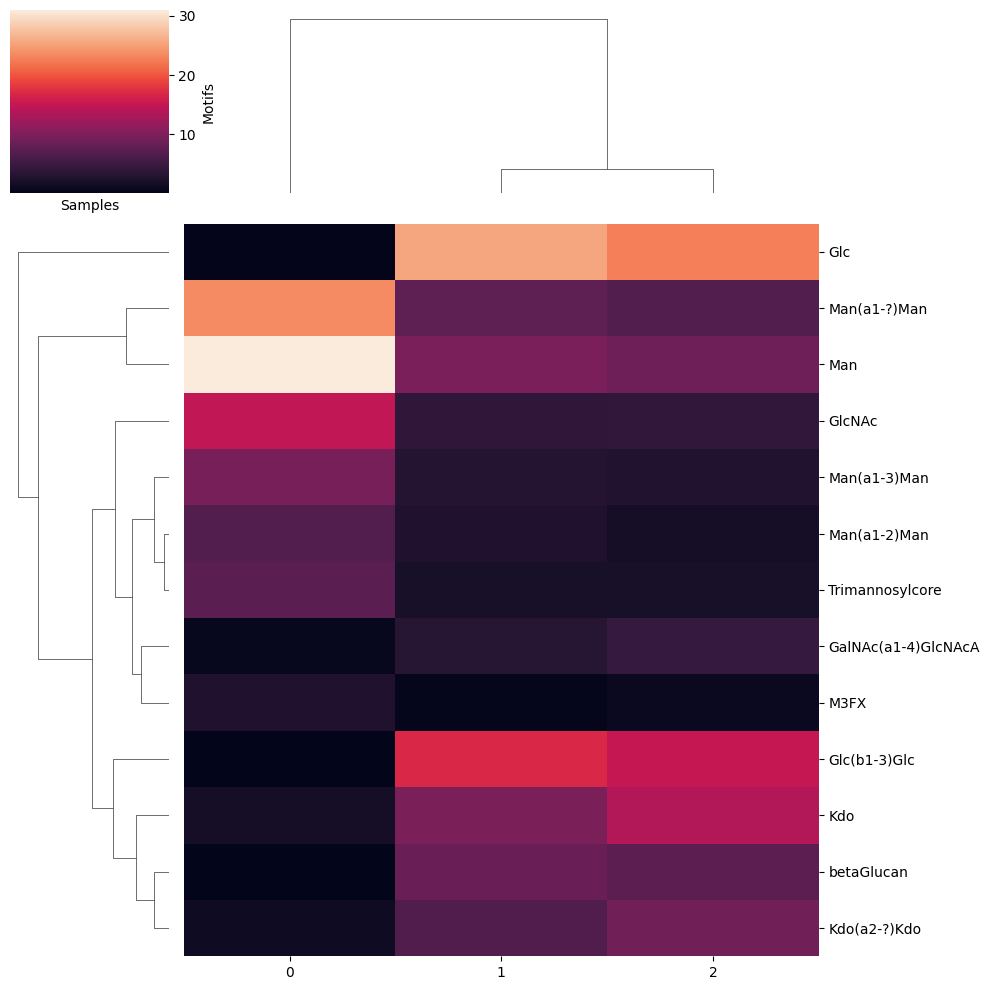

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

get_heatmap(test_df, motifs = True, feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

---

### plot_embeddings

>      plot_embeddings (glycans, emb=None, label_list=None, shape_feature=None,
>                       filepath='', alpha=0.8, palette='colorblind', **kwargs)

plots glycan representations for a list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| emb (dictionary): stored glycan representations; default takes them from trained species-level SweetNet model
| label_list (list): list of same length as glycans if coloring of the plot is desired
| shape_feature (string): monosaccharide/bond used to display alternative shapes for dots on the plot
| filepath (string): absolute path including full filename allows for saving the plot
| alpha (float): transparency of points in plot; default:0.8
| palette (string): color palette to color different classes; default:'colorblind'
| **kwargs: keyword arguments that are directly passed on to matplotlib

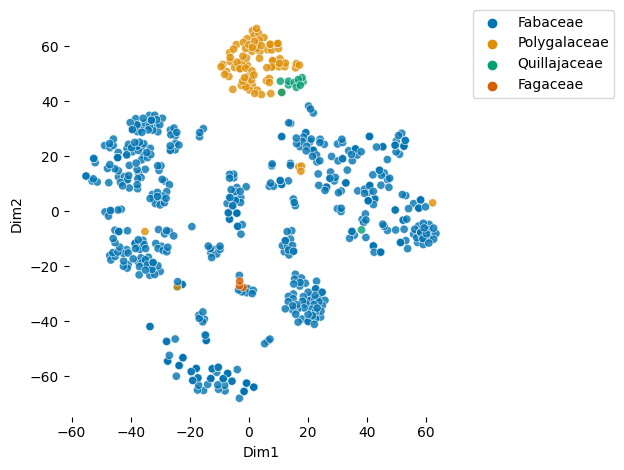

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.glycan.values.tolist(), label_list = df_fabales.Family.values.tolist())

In [ ]:
show_doc(characterize_monosaccharide)

---

### characterize_monosaccharide

>      characterize_monosaccharide (sugar, df=None, mode='sugar',
>                                   glycan_col_name='glycan', rank=None,
>                                   focus=None, modifications=False,
>                                   filepath='', thresh=10)

for a given monosaccharide/linkage, return typical neighboring linkage/monosaccharide

| Arguments:
| :-
| sugar (string): monosaccharide or linkage
| df (dataframe): dataframe to use for analysis; default:df_species
| mode (string): either 'sugar' (connected monosaccharides), 'bond' (monosaccharides making a provided linkage), or 'sugarbond' (linkages that a provided monosaccharides makes); default:'sugar'
| glycan_col_name (string): column name under which glycans can be found; default:'glycan'
| rank (string): add column name as string if you want to filter for a group
| focus (string): add row value as string if you want to filter for a group
| modifications (bool): set to True if you want to consider modified versions of a monosaccharide; default:False
| filepath (string): absolute path including full filename allows for saving the plot
| thresh (int): threshold count of when to include motifs in plot; default:10 occurrences

| Returns:
| :-
| Plots modification distribution and typical neighboring bond/monosaccharide

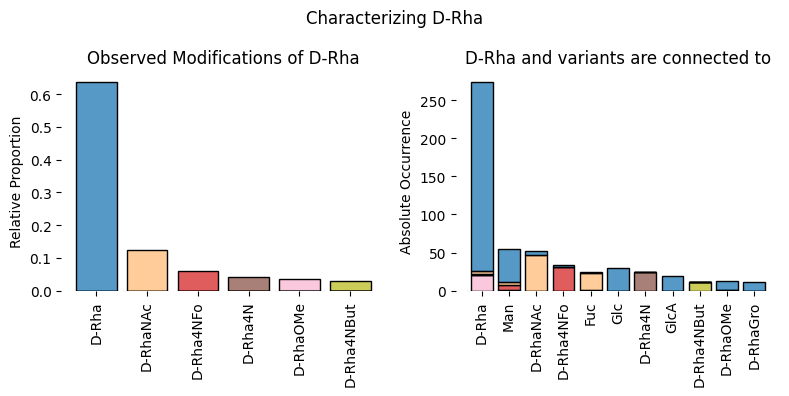

In [ ]:
characterize_monosaccharide('D-Rha', rank = 'Kingdom', focus = 'Bacteria', modifications = True)

In [ ]:
show_doc(get_differential_expression)

---

### get_differential_expression

>      get_differential_expression (df, group1, group2, motifs=False,
>                                   feature_set=['exhaustive', 'known'],
>                                   paired=False, impute=True, sets=False,
>                                   set_thresh=0.9, effect_size_variance=False,
>                                   min_samples=0.1, grouped_BH=False,
>                                   custom_motifs=[], transform=None, gamma=0.1,
>                                   custom_scale=0, glycoproteomics=False,
>                                   level='peptide')

Calculates differentially expressed glycans or motifs from glycomics data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| group1 (list): list of column indices or names for the first group of samples, usually the control
| group2 (list): list of column indices or names for the second group of samples
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| impute (bool): replaces zeroes with a Random Forest based model; default:True
| sets (bool): whether to identify clusters of highly correlated glycans/motifs to test for differential expression; default:False
| set_thresh (float): correlation value used as a threshold for clusters; only used when sets=True; default:0.9
| effect_size_variance (bool): whether effect size variance should also be calculated/estimated; default:False
| min_samples (float): Percent of the samples that need to have non-zero values for glycan to be kept; default: 10%
| grouped_BH (bool): whether to perform two-stage adaptive Benjamini-Hochberg as a grouped multiple testing correction; will SIGNIFICANTLY increase runtime; default:False
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (float or dict): Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
| glycoproteomics (bool): whether the analyzed data in df comes from a glycoproteomics experiment; default:False
| level (string; only relevant if glycoproteomics=True): whether to analyze glycoform differential expression at the level of 'peptide' or 'protein'; default:'peptide'

| Returns:
| :-
| Returns a dataframe with:
| (i) Differentially expressed glycans/motifs/sets
| (ii) Their mean abundance across all samples in group1 + group2
| (iii) Log2-transformed fold change of group2 vs group1 (i.e., negative = lower in group2)
| (iv) Uncorrected p-values (Welch's t-test) for difference in mean
| (v) Corrected p-values (Welch's t-test with two-stage Benjamini-Hochberg correction) for difference in mean
| (vi) Significance: True/False of whether the corrected p-value lies below the sample size-appropriate significance threshold
| (vii) Corrected p-values (Levene's test for equality of variances with Benjamini-Hochberg correction) for difference in variance
| (viii) Effect size as Cohen's d (sets=False) or Mahalanobis distance (sets=True)
| (xi) Corrected p-values of equivalence test to test whether means are significantly equivalent; only done for p-values > 0.05 from (iv)
| (x) [only if effect_size_variance=True] Effect size variance

In [ ]:
test_df = glycomics_data_loader.human_skin_O_PMC5871710_BCC

res = get_differential_expression(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Glycan,Mean abundance,Log2FC,p-val,corr p-val,significant,corr Levene p-val,Effect size,Equivalence p-val
1,GalOS(b1-3)GalNAc,0.159900,-0.870761,0.001250,0.003713,True,0.807896,-0.846484,1.000000
4,Terminal_LacNAc_type2,2.328696,0.483578,0.001472,0.003713,True,0.762200,0.830472,1.000000
2,H_type2,0.247156,-0.697142,0.001696,0.003713,True,0.977269,-0.816553,1.000000
10,Neu5Ac(a2-3)Gal,7.956860,0.262019,0.001856,0.003713,True,0.807896,0.807709,1.000000
3,GlcNAc6S(b1-6)GalNAc,1.046247,0.890133,0.003097,0.004955,True,0.807896,0.757275,1.000000
5,Terminal_LacNAc_type2,2.440640,-0.495544,0.006117,0.008157,True,0.807896,-0.689465,1.000000
13,Neu5Ac,12.726196,0.189771,0.016911,0.019327,True,0.807896,0.585470,1.000000
0,Neu5Ac(a2-8)Neu5Ac,0.038663,-0.574829,0.037809,0.037809,True,0.762200,-0.499215,1.000000
8,Oglycan_core1,3.790085,0.177745,0.046106,0.046106,False,0.807896,0.477146,1.000000
14,Gal,12.886096,0.119731,0.050226,0.050226,False,0.807896,0.467504,0.763072


In [ ]:
show_doc(get_volcano)

---

### get_volcano

>      get_volcano (df_res, y_thresh=0.05, x_thresh=0, n=None,
>                   label_changed=True, x_metric='Log2FC',
>                   annotate_volcano=False, filepath='', **kwargs)

Plots glycan differential expression results in a volcano plot

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv or .xlsx]
| y_thresh (float): corr p threshhold for labeling datapoints; default:0.05
| x_thresh (float): absolute x metric threshold for labeling datapoints; default:0
| n (float): sample size for Bayesian-Adaptive Alpha Adjustment; default = None
| label_changed (bool): if True, add text labels to significantly up- and downregulated datapoints; default:True
| x_metric (string): x-axis metric; default:'Log2FC'; options are 'Log2FC', 'Effect size'
| annotate_volcano (bool): whether to annotate the dots in the plot with SNFG images; default: False
| filepath (string): absolute path including full filename allows for saving the plot
| **kwargs: keyword arguments that are directly passed on to seaborn scatterplot

| Returns:
| :-
| Prints volcano plot

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


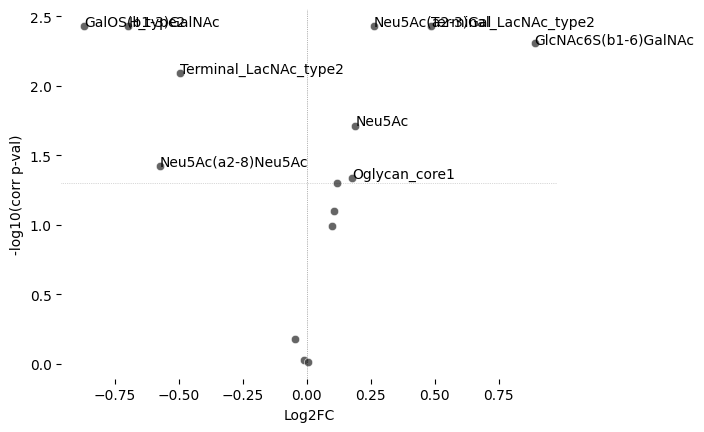

In [ ]:
get_volcano(res)

In [ ]:
show_doc(get_coverage)

---

### get_coverage

>      get_coverage (df, filepath='')

Plot glycan coverage across samples, ordered by average intensity

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| Prints the heatmap

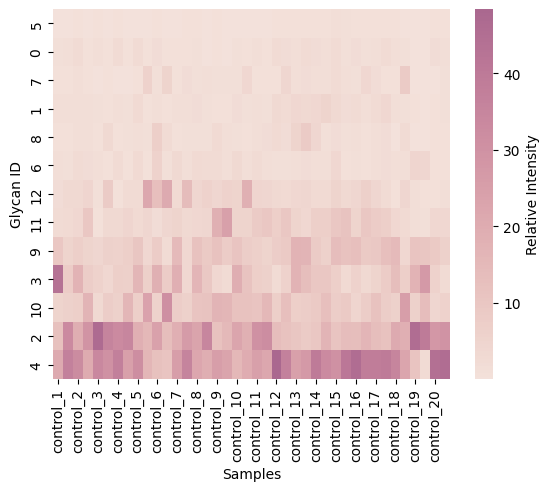

In [ ]:
test_df = pd.concat([test_df.iloc[:, 0], test_df[test_df.columns[1:]].astype(float)], axis = 1)

get_coverage(test_df)

In [ ]:
show_doc(get_pca)

---

### get_pca

>      get_pca (df, groups=None, motifs=False, feature_set=['known',
>               'exhaustive'], pc_x=1, pc_y=2, color=None, shape=None,
>               filepath='', custom_motifs=[], transform=None,
>               rarity_filter=0.05)

PCA plot from glycomics abundance dataframe

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| groups (list): a list of group identifiers for each sample (e.g., [1,1,1,2,2,2,3,3,3]); default:None
|                     alternatively: design dataframe with 'id' column of samples names and additional columns with meta information
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| pc_x (int): principal component to plot on x axis; default:1
| pc_y (int): principal component to plot on y axis; default:2
| color (string): if design dataframe is provided: column name for color grouping; default:None
| shape (string): if design dataframe is provided: column name for shape grouping; default:None
| filepath (string): absolute path including full filename allows for saving the plot
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (string): whether to transform the data before plotting, options are "CLR" and "ALR", recommended for glycomics data; default: no transformation
| rarity_filter (float): proportion of samples that need to have a non-zero value for a variable to be included; default:0.05

| Returns:
| :-
| Prints PCA plot

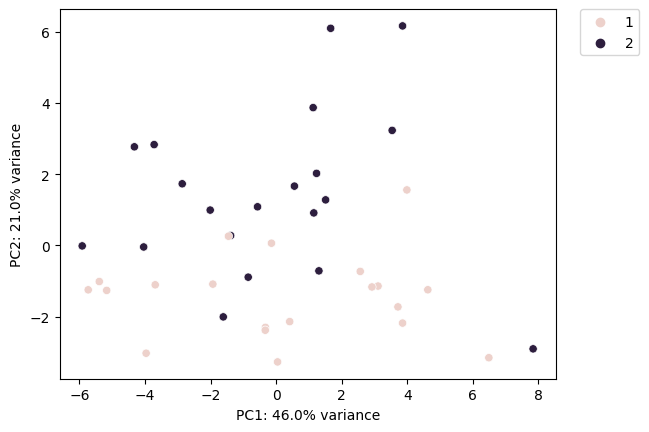

In [ ]:
get_pca(test_df, motifs = True, groups = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2])

In [ ]:
show_doc(get_pval_distribution)

---

### get_pval_distribution

>      get_pval_distribution (df_res, filepath='')

p-value distribution plot of glycan differential expression result

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv]
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| prints p-value distribution plot

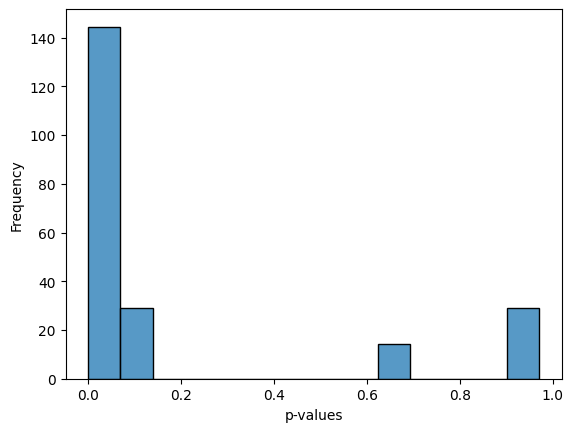

In [ ]:
get_pval_distribution(res)

In [ ]:
show_doc(get_ma)

---

### get_ma

>      get_ma (df_res, log2fc_thresh=1, sig_thresh=0.05, filepath='')

MA plot of glycan differential expression result

| Arguments:
| :-
| df_res (dataframe): output from get_differential_expression [alternative: filepath to .csv or .xlsx]
| log2fc_thresh (int): absolute Log2FC threshold for highlighting datapoints
| sig_thresh (int): significance threshold for highlighting datapoints
| filepath (string): absolute path including full filename allows for saving the plot

| Returns:
| :-
| prints MA plot

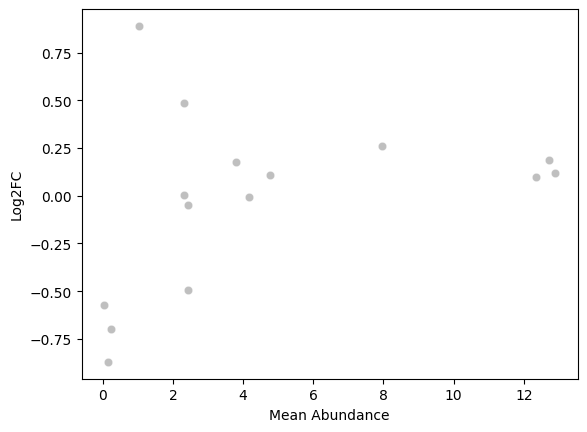

In [ ]:
get_ma(res)

In [ ]:
show_doc(get_glycanova)

---

### get_glycanova

>      get_glycanova (df, groups, impute=True, motifs=False,
>                     feature_set=['exhaustive', 'known'], min_samples=0.1,
>                     posthoc=True, custom_motifs=[], transform=None, gamma=0.1,
>                     custom_scale=0)

Calculate an ANOVA for each glycan (or motif) in the DataFrame

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| groups (list): a list of group identifiers for each sample (e.g., [1,1,1,2,2,2,3,3,3])
| impute (bool): replaces zeroes with with a Random Forest based model; default:True
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),     |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),     |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),     |   and 'chemical' (molecular properties of glycan)
| min_samples (float): Percent of the samples that need to have non-zero values for glycan to be kept; default: 10%
| posthoc (bool): whether to do Tukey's HSD test post-hoc to find out which differences were significant; default:True
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (dict): dictionary of type group_idx : mean(group)/min(mean(groups)) for an informed scale model

| Returns:
| :-
| (i) a pandas DataFrame with an F statistic, corrected p-value, indication of its significance, and effect size (Omega squared) for each glycan.
| (ii) a dictionary of type glycan : pandas DataFrame, with post-hoc results for each glycan with a significant ANOVA.

In [ ]:
test_df2 = glycomics_data_loader.HIV_gagtransfection_O_PMID35112714

anv, ph = get_glycanova(test_df2, [1,1,1,1,2,2,2,2,3,3,3,3], motifs = False)
anv

You're working with an alpha of 0.06364810000741428 that has been adjusted for your sample size of 12.


,Glycan,F statistic,p-val,corr p-val,significant,Effect size
0,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,2.048939,0.184794,0.332629,False,0.090826
3,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,2.064493,0.182831,0.332629,False,0.092048
4,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,2.179036,0.169139,0.332629,False,0.100953
5,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,3.289342,0.084665,0.332629,False,0.179004
8,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-...,2.278187,0.158287,0.332629,False,0.108522
1,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,1.310033,0.316703,0.475055,False,0.028680
6,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)...,0.823133,0.469573,0.535374,False,-0.017133
7,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-?)[GlcNAc(b1-?)...,0.807355,0.475888,0.535374,False,-0.018690
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.420633,0.668901,0.668901,False,-0.058400


In [ ]:
show_doc(get_meta_analysis)

---

### get_meta_analysis

>      get_meta_analysis (effect_sizes, variances, model='fixed', filepath='',
>                         study_names=[])

Fixed-effects model or random-effects model for meta-analysis of glycan effect sizes

| Arguments:
| :-
| effect_sizes (array-like): Effect sizes (e.g., Cohen's d) from each study
| variances (array-like): Corresponding effect size variances from each study
| model (string): Whether to use 'fixed' or 'random' effects model
| filepath (string): absolute path including full filename allows for saving the Forest plot
| study_names (list): list of strings indicating the name of each study

| Returns:
| :-
| (1) The combined effect size 
| (2) The p-value for the combined effect size

In [ ]:
get_meta_analysis([-8.759, -6.363, -5.199, -3.952],
                 [7.061, 4.041, 2.919, 1.968])

(-5.326913553837341, 3.005077298112724e-09)

In [ ]:
show_doc(get_time_series)

---

### get_time_series

>      get_time_series (df, impute=True, motifs=False, feature_set=['known',
>                       'exhaustive'], degree=1, min_samples=0.1,
>                       custom_motifs=[], transform=None, gamma=0.1,
>                       custom_scale=0)

Analyzes time series data of glycans using an OLS model

| Arguments:
| :-
| df (dataframe): dataframe containing sample IDs of style sampleID_UnitTimepoint_replicate (e.g., T1_h5_r1) in first column and glycan relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| impute (bool): replaces zeroes with a Random Forest based model; default:True
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),     |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),     |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),     |   and 'chemical' (molecular properties of glycan)
| degree (int): degree of the polynomial for regression, default:1 for linear regression
| min_samples (float): Percent of the samples that need to have non-zero values for glycan to be kept; default: 10%
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (dict): dictionary of type timepoint : mean(timepoint)/min(mean(timepoints)) for an informed scale model

| Returns:
| :-
| Returns a dataframe with:
| (i) Glycans/motifs potentially exhibiting significant changes over time
| (ii) The slope of their expression curve over time
| (iii) Uncorrected p-values (t-test) for testing whether slope is significantly different from zero
| (iv) Corrected p-values (t-test with two-stage Benjamini-Hochberg correction) for testing whether slope is significantly different from zero
| (v) Significance: True/False whether the corrected p-value lies below the sample size-appropriate significance threshold

In [ ]:
t_dic = {}
t_dic["ID"] = ["D1_h5_r1", "D1_h5_r2", "D1_h5_r3", "D1_h10_r1", "D1_h10_r2", "D1_h10_r3", "D1_h15_r1", "D1_h15_r2", "D1_h15_r3"]
t_dic["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc"] = [0.33, 0.31, 0.35, 1.51, 1.57, 1.66, 2.11, 2.04, 2.09]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [0.78, 1.01, 0.98, 0.88, 1.11, 0.72, 1.22, 1.00, 0.54]
t_dic["Neu5Ac(a2-6)GalNAc"] = [0.11, 0.09, 0.14, 0.02, 0.07, 0.10, 0.11, 0.09, 0.08]
get_time_series(pd.DataFrame(t_dic).set_index("ID").T)

You're working with an alpha of 0.0694557066556809 that has been adjusted for your sample size of 9.


,Glycan,Change,p-val,corr p-val,significant
1,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,0.196364,0.003197,0.003197,True
0,Fuc(a1-2)Gal(b1-3)GalNAc,-0.090515,0.027593,0.027593,True
2,Neu5Ac(a2-6)GalNAc,-0.108829,0.087192,0.087192,False


In [ ]:
show_doc(get_jtk)

---

### get_jtk

>      get_jtk (df_in, timepoints, periods, interval, motifs=False,
>               feature_set=['known', 'exhaustive', 'terminal'],
>               custom_motifs=[], transform=None, gamma=0.1)

Detecting rhythmically expressed glycans via the Jonckheere–Terpstra–Kendall (JTK) algorithm

| Arguments:
| :-
| df_in (pd.DataFrame): A dataframe containing data for analysis. [alternative: filepath to .csv or .xlsx]
|   (column 0 = molecule IDs, then arranged in groups and by ascending timepoints)
| timepoints (int): number of timepoints in the experiment (each timepoint must have the same number of replicates).
| periods (list): number of timepoints (as int) per cycle.
| interval (int): units of time (Arbitrary units) between experimental timepoints.
| motifs (bool): a flag for running structural of motif-based analysis (True = run motif analysis); default:False.
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),     |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),     |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),     |   and 'chemical' (molecular properties of glycan)
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1

| Returns:
| :-
| Returns a pandas dataframe containing the adjusted p-values, and most important waveform parameters for each
| molecule in the analysis.

In [ ]:
t_dic = {}
t_dic["Neu5Ac(a2-3)Gal(b1-3)GalNAc"] = [0.433138901, 0.149729209, 0.358018822, 0.537641256, 1.526963756, 1.349986672, 0.75156406, 0.736710183]
t_dic["Gal(b1-3)GalNAc"] = [0.919762334, 0.760237184, 0.725566662, 0.459945797, 0.523801515, 0.695106926, 0.627632047, 1.183511209]
t_dic["Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"] = [0.533138901, 0.119729209, 0.458018822, 0.637641256, 1.726963756, 1.249986672, 0.55156406, 0.436710183]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [3.862169504, 5.455032837, 3.858163289, 5.614650335, 3.124254095, 4.189550337, 4.641831312, 4.19538484]
tps = 8  # number of timepoints in experiment
periods = [8]  # number of timepoints per cycle
interval = 3  # units of time between experimental timepoints
t_df = pd.DataFrame(t_dic).T
t_df.columns = ["T3", "T6", "T9", "T12", "T15", "T18", "T21", "T24"]
get_jtk(t_df.reset_index(), tps, periods, interval)

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.


,Molecule_Name,BH_Q_Value,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
1,Gal(b1-3)GalNAc,0.009524,0.003175,24.0,1.5,4.948620e-02,True
0,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.066071,0.044048,24.0,15.0,3.577867e-18,True
2,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.244048,0.244048,24.0,12.0,3.470592e-01,False
3,Fuc(a1-2)Gal(b1-3)GalNAc,0.244048,0.244048,24.0,4.5,4.923714e-01,False


In [ ]:
get_jtk(t_df.reset_index(), tps, periods, interval, motifs = True, feature_set = ['terminal'])

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.


,Molecule_Name,BH_Q_Value,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
0,Terminal_Neu5Ac(a2-3),0.009524,0.003175,0.0,0.0,0.000000,True
2,Terminal_Neu5Ac(a2-?),0.010417,0.006944,0.0,0.0,0.000000,True
1,Terminal_Neu5Ac(a2-6),0.244048,0.244048,24.0,13.5,0.372370,False
4,Terminal_Fuc(a1-2),0.244048,0.244048,24.0,4.5,0.328305,False
3,Terminal_Gal(b1-3),0.289815,0.289815,24.0,4.5,0.220100,False


In [ ]:
show_doc(get_biodiversity)

---

### get_biodiversity

>      get_biodiversity (df, group1, group2, metrics=['alpha', 'beta'],
>                        motifs=False, feature_set=['exhaustive', 'known'],
>                        custom_motifs=[], paired=False, permutations=999,
>                        transform=None, gamma=0.1, custom_scale=0)

Calculates diversity indices from glycomics data, similar to alpha/beta diversity etc in microbiome data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| group1 (list): a list of column identifiers corresponding to samples in group 1
| group2 (list): a list of column identifiers corresponding to samples in group 2 (note, if an empty list is provided, group 1 can be used a list of group identifiers for each column - e.g., [1,1,2,2,3,3...])
| metrics (list): which diversity metrics to calculate (alpha, beta); default:['alpha', 'beta']
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| permutations (int): number of permutations to perform in ANOSIM and PERMANOVA statistical test; default:999
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (float or dict): Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)

| Returns:
| :-
| Returns a dataframe with:
| (i) Diversity indices/metrics
| (ii) Mean value of diversity metrics in group 1 (only alpha)
| (iii) Mean value of diversity metrics in group 2 (only alpha)
| (iv) Uncorrected p-values (Welch's t-test) for difference in mean
| (v) Corrected p-values (Welch's t-test with two-stage Benjamini-Hochberg correction) for difference in mean
| (vi) Significance: True/False of whether the corrected p-value lies below the sample size-appropriate significance threshold
| (vii) Effect size as Cohen's d (ANOSIM R for beta; F statistics for PERMANOVA and Shannon/Simpson (ANOVA))

In [ ]:
res = get_biodiversity(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Metric,Group1 mean,Group2 mean,p-val,Effect size,corr p-val,significant
0,simpson_diversity,0.876756,0.874348,0.000443,-0.948203,0.000443,True
1,shannon_diversity,2.244523,2.225758,0.001255,-0.846077,0.001255,True
2,Beta diversity (PERMANOVA),NaN,NaN,0.003003,43.699385,0.003003,True
3,Beta diversity (ANOSIM),NaN,NaN,0.004004,0.147461,0.004004,True
4,species_richness,15.000000,15.000000,1.000000,0.000000,1.000000,False


In [ ]:
show_doc(get_SparCC)

---

### get_SparCC

>      get_SparCC (df1, df2, motifs=False, feature_set=['known', 'exhaustive'],
>                  custom_motifs=[], transform=None, gamma=0.1)

Performs SparCC (Sparse Correlations for Compositional Data) on two (glycomics) datasets. Samples should be in the same order.

| Arguments:
| :-
| df1 (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| df2 (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1

| Returns:
| :-
| Returns (i) a dataframe of pairwise correlations (Spearman's rho)
| and (ii) a dataframe with corrected p-values (two-stage Benjamini-Hochberg)

You're working with an alpha of 0.04787928055709467 that has been adjusted for your sample size of 31.


<seaborn.matrix.ClusterGrid>

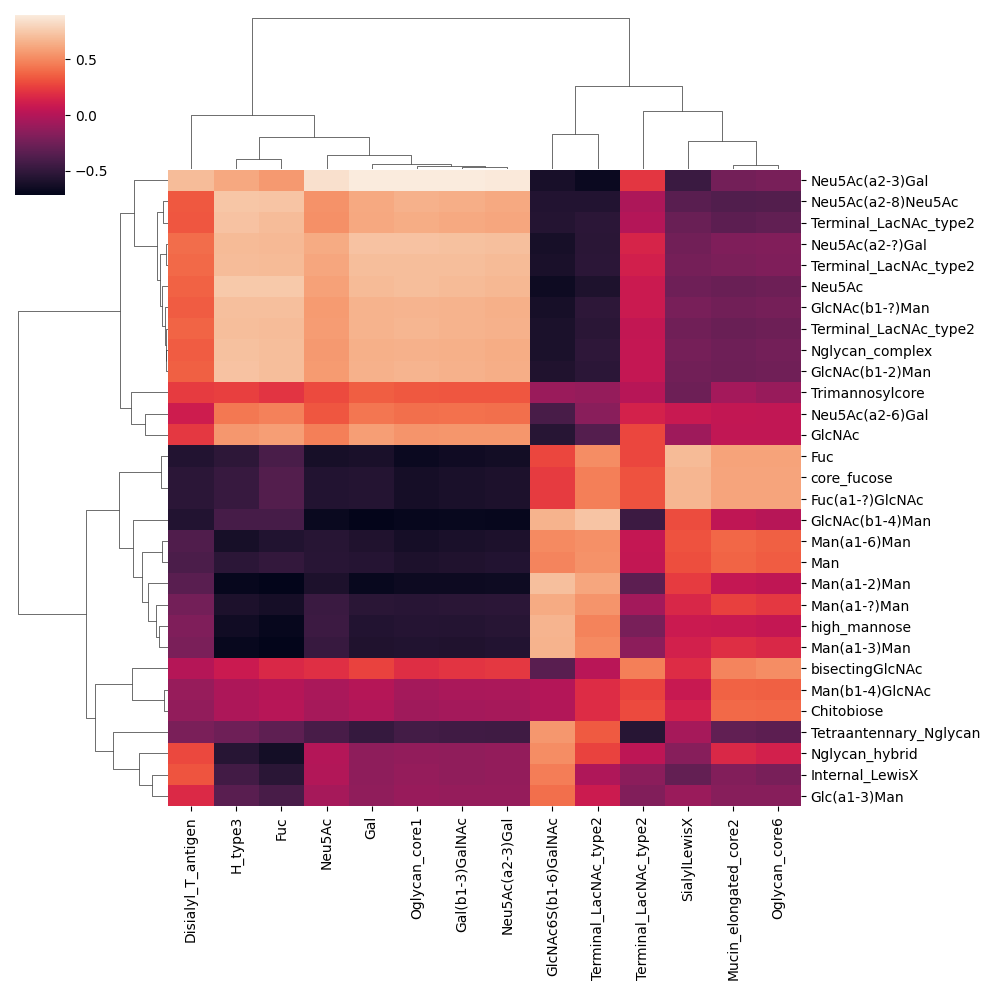

In [ ]:
df1 = glycomics_data_loader.time_series_N_PMID32149347
df2 = glycomics_data_loader.time_series_O_PMID32149347
df1 = pd.merge(df1, df2[['ID']], on = 'ID', how = 'inner')
df2 = pd.merge(df2, df1[['ID']], on = 'ID', how = 'inner')
df1 = df1.set_index(df1.columns.tolist()[0]).T.reset_index()
df2 = df2.set_index(df2.columns.tolist()[0]).T.reset_index()

corr, pval = get_SparCC(df1, df2, motifs = True, transform = "CLR")
sns.clustermap(corr)

In [ ]:
show_doc(get_roc)

---

### get_roc

>      get_roc (df, group1, group2, motifs=False, feature_set=['known',
>               'exhaustive'], paired=False, impute=True, min_samples=0.1,
>               custom_motifs=[], transform=None, gamma=0.1, custom_scale=0,
>               filepath='', multi_score=False)

Calculates ROC AUC for every feature and, optionally, plots the best

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| group1 (list): list of column indices or names for the first group of samples, usually the control
| group2 (list): list of column indices or names for the second group of samples (note, if an empty list is provided, group 1 can be used a list of group identifiers for each column - e.g., [1,1,2,2,3,3...])
| motifs (bool): whether to analyze full sequences (False) or motifs (True); default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| impute (bool): replaces zeroes with a Random Forest based model; default:True
| min_samples (float): Percent of the samples that need to have non-zero values for glycan to be kept; default: 10%
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| transform (str): transformation to escape Aitchison space; options are CLR and ALR (use ALR if you have many glycans (>100) with low values); default:will be inferred
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (float or dict): Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
| filepath (string): absolute path including full filename allows for saving the plot, if plot=True
| multi_score (bool): whether to find the best glycan risk score, containing multiple glycan features; default:False

| Returns:
| :-
| Returns a sorted list of tuples of type (glycan, AUC score) and, optionally, ROC curve for best feature

[('GlcNAc6S(b1-6)GalNAc', 0.7500000000000001),
 ('Neu5Ac(a2-3)Gal', 0.665),
 ('Neu5Ac', 0.6375),
 ('Oglycan_core1', 0.6125),
 ('Gal(b1-3)GalNAc', 0.595),
 ('GalNAc', 0.59),
 ('Gal', 0.585),
 ('Mucin_elongated_core2', 0.51),
 ('Disialyl_T_antigen', 0.46249999999999997),
 ('Neu5Ac(a2-6)GalNAc', 0.445),
 ('Neu5Ac(a2-8)Neu5Ac', 0.37),
 ('Terminal_LacNAc_type2', 0.2825),
 ('H_type2', 0.25250000000000006),
 ('GalOS(b1-3)GalNAc', 0.2425)]

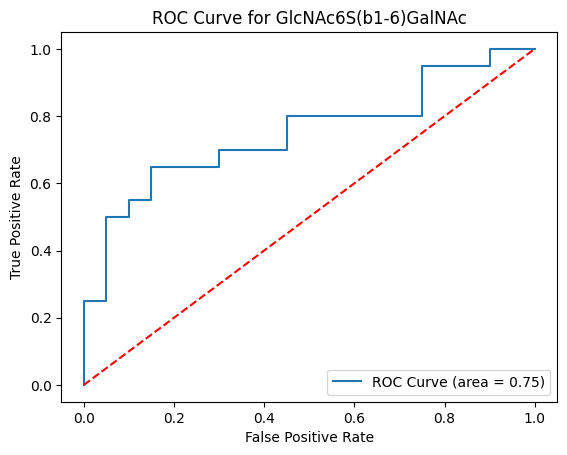

In [ ]:
get_roc(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)

In [ ]:
show_doc(get_lectin_array)

---

### get_lectin_array

>      get_lectin_array (df, group1, group2, paired=False, transform='')

Function for analyzing lectin array data for two or more groups.

| Arguments:
| :-
| df (dataframe): dataframe containing samples as rows and lectins as columns [alternative: filepath to .csv or .xlsx]
| group1 (list): list of indices or names for the first group of samples, usually the control
| group2 (list): list of indices or names for the second group of samples (note, if an empty list is provided, group 1 can be used a list of group identifiers for each column - e.g., [1,1,2,2,3,3...])
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| transform (string): optional data-processing, "log2" transforms df with np.log2; default:nothing

| Returns:
| :-
| Returns an output dataframe with:
| (i) Deduced glycan motifs altered between groups
| (ii) human names for features identified in the motifs from (i)
| (iii) Lectins supporting the change in (i)
| (iv) Direction of the change (e.g., "up" means higher in group2)
| (v) Score/Magnitude of the change (remember, if you have more than two groups this reports on any pairwise combination, like an ANOVA)
| (vi) Clustering of the scores into highly/moderate/low significance findings

In [ ]:
lectin_df = lectin_array_data_loader.A549_influenza_PMID33046650
get_lectin_array(lectin_df, [5,6,7], [8,9,10])

Lectin "Ab-LeB-1" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APP" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group B [CLCP-19B]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group H2" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CA19-9 [121SLE]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CCA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [ICRF29-2]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [MY-1]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [SP-159]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Frossman" is not found 

,motif,named_motifs,lectin(s),change,score,significance
39,Neu5Ac(a2-6)Gal(b1-3)GlcNAc,[Internal_LacNAc_type1],"PSL, SNA, TJA-I, BDA, BPA, WGA_1, WGA_2",down,9.08,highly significant
38,Neu5Ac(a2-6)Gal(b1-4)GlcNAc,[Internal_LacNAc_type2],"PSL, SNA, TJA-I, BDA, BPA, ECA, RCA120, Ricin ...",down,8.57,highly significant
7,Man(a1-2),[],"ASA, Con A, CVN, HHL, SVN_1, GRFT, SVN_2, SNA-...",up,4.87,moderately significant
14,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","CA, CAA, DSA_1, DSA_2, DSA_3, AMA, BDA, BPA, C...",up,3.57,moderately significant
4,Gal(b1-3)GalNAc,[Oglycan_core1],"ACA, AIA, MPA, PNA_1, PNA_2, BDA, BPA",up,3.49,moderately significant
10,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-4)][G...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","Blackbean, Calsepa, PHA-E_1, PHA-E_2, AMA, BDA...",up,2.77,moderately significant
16,Fuc(a1-2)Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Ga...,"[Internal_LacNAc_type2, H_type3]","Cholera Toxin, AAA, AAL, ACA, AIA, AOL, BDA, B...",up,2.54,moderately significant
47,GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...,"[Chitobiose, Trimannosylcore, core_fucose, Ngl...","TL, AAL, AMA, AOL, Con A, GNA, GNL, HHL, LcH, ...",up,2.50,moderately significant
15,Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Gal(b1-4)Gl...,[Internal_LacNAc_type2],"Cholera Toxin, ACA, AIA, BDA, BPA, CSA, ECA, L...",up,2.49,moderately significant
18,Man(a1-6),[],"Con A, GNA, GNL, HHL, NPA, SNA-II, UDA",up,2.35,moderately significant


In [ ]:
show_doc(get_glycoshift_per_site)

---

### get_glycoshift_per_site

>      get_glycoshift_per_site (df, group1, group2, paired=False, impute=True,
>                               min_samples=0.2, gamma=0.1, custom_scale=0)

Calculates differentially expressed glycans or motifs from glycomics data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences in first column and relative abundances in subsequent columns [alternative: filepath to .csv or .xlsx]
| group1 (list): list of column indices or names for the first group of samples, usually the control
| group2 (list): list of column indices or names for the second group of samples
| paired (bool): whether samples are paired or not (e.g., tumor & tumor-adjacent tissue from same patient); default:False
| impute (bool): replaces zeroes with a Random Forest based model; default:True
| min_samples (float): Percent of the samples that need to have non-zero values for glycan to be kept; default: 20%
| gamma (float): uncertainty parameter to estimate scale uncertainty for CLR transformation; default: 0.1
| custom_scale (float or dict): Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)

| Returns:
| :-
| Returns a dataframe with:
| (for each condition/interaction feature)
| (i) Regression coefficient from the GLM (indicating direction of change in the treatment condition)
| (ii) Corrected p-values (two-tailed t-test with two-stage Benjamini-Hochberg correction) for testing the coefficient against zero
| (iii) Significance: True/False of whether the corrected p-value lies below the sample size-appropriate significance threshold

In [ ]:
df_milk = glycoproteomics_data_loader.human_milk_N_PMID34087070

get_glycoshift_per_site(df_milk, ['Colostrum1', 'Colostrum2', 'Colostrum3'], ['Mature1', 'Mature2', 'Mature3'])

You're working with an alpha of 0.07862467893233027 that has been adjusted for your sample size of 6.


,Condition_coefficient,Condition_corr_pval,Condition_significant,HexNAc_Condition_coefficient,HexNAc_Condition_corr_pval,HexNAc_Condition_significant,Neu5Ac_Condition_coefficient,Neu5Ac_Condition_corr_pval,Neu5Ac_Condition_significant,Hex_Condition_coefficient,Hex_Condition_corr_pval,Hex_Condition_significant,dHex_Condition_coefficient,dHex_Condition_corr_pval,dHex_Condition_significant
sp|P10909|CLUS_103,-0.491863,0.000000e+00,True,-1.967453,0.000000e+00,True,14.126589,0.000000e+00,True,-2.459317,0.000000e+00,True,-0.491863,0.000000e+00,True
sp|P01024|CO3_85,-17.373003,1.003237e-173,True,-34.746005,1.003237e-173,True,0.000000,1.000000e+00,False,11.581966,1.715837e-174,True,0.000000,1.000000e+00,False
sp|P47710|CASA1_69,0.286044,2.723269e-20,True,1.144177,2.723269e-20,True,0.286044,2.924993e-20,True,-1.189936,2.739981e-20,True,2.906202,5.887738e-21,True
sp|P02790|HEMO_453,0.001713,1.799430e-03,True,0.006852,1.799430e-03,True,0.003426,1.546177e-03,True,0.008565,1.799430e-03,True,0.000000,1.000000e+00,False
sp|P00709|LALBA_90,-1.442420,2.729599e-03,True,-5.769682,2.729599e-03,True,-1.916889,2.636431e-01,False,4.180629,2.439209e-03,True,6.620051,5.887738e-21,True
sp|Q13410|BT1A1_55,-28.482364,2.803826e-02,True,21.412902,1.116272e-02,True,-12.158840,1.471196e-04,True,-7.069462,8.828572e-02,False,-5.487183,2.612213e-02,True
sp|P07602|SAP_426,0.002916,3.445095e-02,True,0.005832,3.445095e-02,True,0.000000,1.000000e+00,False,0.014579,3.445095e-02,True,0.000000,1.000000e+00,False
sp|P02765|FETUA_156,-0.001227,3.445095e-02,True,-0.004906,3.445095e-02,True,-0.002453,4.228900e-02,True,-0.006133,3.445095e-02,True,0.000000,1.000000e+00,False
sp|P10909|CLUS_86,0.002228,4.343526e-02,True,0.008911,3.948660e-02,True,0.002228,5.183632e-02,True,0.011138,4.343526e-02,True,0.002228,5.004886e-02,True
sp|P06858|LIPL_70,0.000405,4.343526e-02,True,0.001622,3.948660e-02,True,0.000811,5.183632e-02,True,0.002027,4.343526e-02,True,0.000405,5.004886e-02,True


## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(annotate_glycan)

---

### annotate_glycan

>      annotate_glycan (glycan, motifs=None, termini_list=[], gmotifs=None)

searches for known motifs in glycan sequence

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format (or as networkx graph) that has to contain a floating substituent
| motifs (dataframe): dataframe of glycan motifs (name + sequence), can be used with a list of glycans too; default:motif_list
| termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')
| gmotifs (networkx): precalculated motif graphs for speed-up; default:None

| Returns:
| :-
| Returns dataframe with counts of motifs in glycan

In [ ]:
annotate_glycan("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,...,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(annotate_dataset)

---

### annotate_dataset

>      annotate_dataset (glycans, motifs=None, feature_set=['known'],
>                        termini_list=[], condense=False, custom_motifs=[])

wrapper function to annotate motifs in list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'known'; options are: 'known' (hand-crafted glycan features),   |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs of size 1),   |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs),   |   and 'chemical' (molecular properties of glycan)
| termini_list (list): list of monosaccharide/linkage positions for motifs (from 'terminal', 'internal', and 'flexible')
| condense (bool): if True, throws away columns with only zeroes; default:False
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty

| Returns:
| :-                      
| Returns dataframe of glycans (rows) and presence/absence of known motifs (columns)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

Annotate Test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,Sda,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core1,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(quantify_motifs)

---

### quantify_motifs

>      quantify_motifs (df, glycans, feature_set, custom_motifs=[],
>                       remove_redundant=True)

Extracts and quantifies motifs for a dataset

| Arguments:
| :-
| df (dataframe): dataframe containing relative abundances (each sample one column) [alternative: filepath to .csv or .xlsx]
| glycans(list): glycans as IUPAC-condensed strings
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is ['exhaustive','known']; options are: 'known' (hand-crafted glycan features),     |   'graph' (structural graph features of glycans), 'exhaustive' (all mono- and disaccharide features), 'terminal' (non-reducing end motifs),     |   'terminal2' (non-reducing end motifs of size 2), 'terminal3' (non-reducing end motifs of size 3), 'custom' (specify your own motifs in custom_motifs), and 'chemical' (molecular properties of glycan)
| custom_motifs (list): list of glycan motifs, used if feature_set includes 'custom'; default:empty
| remove_redundant (bool): whether to remove redundant motifs via clean_up_heatmap; default:True

| Returns:
| :-
| Returns a pandas DataFrame with motifs as columns and samples as rows

In [ ]:
quantify_motifs(test_df.iloc[:, 1:], test_df.iloc[:, 0].values.tolist(), ['known', 'exhaustive'])

,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,...,control_16,tumor_16,control_17,tumor_17,control_18,tumor_18,control_19,tumor_19,control_20,tumor_20
Neu5Ac(a2-8)Neu5Ac,0.084745,0.120050,0.388219,0.055402,0.279696,0.082135,0.369784,0.022555,0.080158,0.084913,...,0.485839,0.629202,0.535171,0.637019,0.245015,0.127952,0.029853,0.022643,0.219166,0.331947
GalOS(b1-3)GalNAc,0.843710,1.185047,2.152084,0.687093,1.564450,0.381914,2.389590,0.533142,2.497482,0.338889,...,2.066978,1.088630,1.462826,2.259636,1.687785,1.137672,0.024033,0.117449,1.972512,1.304717
H_type2,1.347737,0.892651,2.468405,1.810795,1.589162,0.449339,2.640132,0.572828,2.763890,0.737076,...,1.070249,0.647786,1.440912,1.810304,1.722289,1.475260,4.847788,4.552496,0.480035,0.494123
GlcNAc6S(b1-6)GalNAc,2.707913,4.438043,6.198123,6.684838,1.478960,11.921934,0.892356,3.821469,4.605009,28.210391,...,6.241593,11.157860,7.997660,4.916252,0.937290,15.269626,1.463159,0.565249,1.251077,2.680253
Terminal_LacNAc_type2,8.845085,10.063160,13.435501,28.834006,5.585973,11.359659,11.672584,21.193308,12.734919,28.597709,...,10.883437,17.991155,21.166792,16.161351,11.909325,29.924308,12.820872,19.107379,8.802443,10.268911
Terminal_LacNAc_type2,52.982192,13.183951,24.413523,12.870782,9.555884,9.822266,12.628910,13.916662,26.569737,10.733867,...,18.779972,12.157928,14.828507,20.879287,27.689619,10.734756,28.328965,37.870847,14.835019,8.910804
Disialyl_T_antigen,20.803836,36.895471,32.803297,20.401157,33.971366,30.150599,37.703636,24.728411,31.798990,15.989214,...,46.337629,39.476930,39.087708,40.348217,35.791797,22.968160,11.026029,2.613718,44.676379,46.125360
Neu5Ac(a2-6)GalNAc,23.063482,39.304399,36.644881,22.263129,36.571122,31.229766,41.628644,26.256121,37.088978,17.054227,...,50.675599,41.982557,42.829042,46.391984,38.682564,25.118814,11.540028,2.937334,47.171520,48.274238
Oglycan_core1,37.329013,75.567842,59.998893,57.608119,83.293693,78.436161,73.308916,64.356888,58.197862,60.329536,...,68.269613,68.762287,62.541874,60.699726,58.713271,58.203265,58.826129,42.904325,74.390026,79.515568
Neu5Ac(a2-3)Gal,57.345927,94.670033,83.675402,103.574200,91.775344,106.231617,90.136699,98.461821,81.110136,117.087919,...,97.928245,109.749014,101.760261,93.222423,86.403840,96.715461,80.029183,69.040921,95.565848,99.973512


In [ ]:
show_doc(get_k_saccharides)

---

### get_k_saccharides

>      get_k_saccharides (glycans, size=2, up_to=False, just_motifs=False,
>                         terminal=False)

function to retrieve k-saccharides (default:disaccharides) occurring in a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed nomenclature
| size (int): number of monosaccharides per -saccharide, default:2 (for disaccharides)
| up_to (bool): in theory: include -saccharides up to size k; in practice: include monosaccharides; default:False
| just_motifs (bool): if you only want the motifs as a nested list, no dataframe with counts; default:False
| terminal (bool): whether to only count terminal subgraphs; default:False

| Returns:
| :-                 
| Returns dataframe with k-saccharide counts (columns) for each glycan (rows)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
out = get_k_saccharides(glycans, size = 3)

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,GalNAc(a1-4)GlcNAcA(a1-4)Kdo,GlcN(b1-7)Kdo(a2-5)Kdo,GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,GlcNAcA(a1-4)Kdo(a2-5)Kdo,GlcNAcA(a1-4)[GlcN(b1-7)]Kdo,Kdo(a2-4)Kdo(a2-6)GlcN4P,Kdo(a2-5)Kdo(a2-6)GlcN4P,Kdo(a2-5)[Kdo(a2-4)]Kdo,Kdo(a2-6)GlcN4P(b1-6)GlcN4P,Kdo(a2-?)Kdo(a2-?)GlcN4P,Man(a1-2)Man(a1-2)Man,Man(a1-2)Man(a1-3)Man,Man(a1-3)Man(a1-6)Man,Man(a1-3)Man(b1-4)GlcNAc,Man(a1-3)[Man(a1-6)]Man,Man(a1-3)[Xyl(b1-2)]Man,Man(a1-6)Man(b1-4)GlcNAc,Man(a1-6)[Xyl(b1-2)]Man,Man(a1-?)Man(a1-?)Man,Man(a1-?)Man(b1-?)GlcNAc,Man(a1-?)[Xyl(b1-?)]Man,Man(b1-4)GlcNAc(b1-4)GlcNAc,Xyl(b1-2)Man(b1-4)GlcNAc
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,2,2,1,1
1,0,0,0,0,0,0,0,0,0,0,1,1,2,1,0,0,1,0,4,2,0,1,0
2,1,1,0,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(get_terminal_structures)

---

### get_terminal_structures

>      get_terminal_structures (glycan, size=1)

returns terminal structures from all non-reducing ends (monosaccharide+linkage)

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed nomenclature or as networkx graph
| size (int): how large the extracted motif should be in terms of monosaccharides (for now 1 or 2 are supported;   |   if you want to go higher use get_k_saccharides with terminal = True); default:1

| Returns:
| :-
| Returns a list of terminal structures (strings)

In [ ]:
get_terminal_structures("Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc")

['Neu5Ac(a2-3)', 'Neu5Ac(a2-6)']

In [ ]:
show_doc(get_molecular_properties)

---

### get_molecular_properties

>      get_molecular_properties (glycan_list, verbose=False, placeholder=False)

given a list of glycans, uses pubchempy to return various molecular parameters retrieved from PubChem

| Arguments:
| :-
| glycan_list (list): list of glycans in IUPAC-condensed
| verbose (bool): set True to print SMILES not found on PubChem; default:False
| placeholder (bool): whether failed requests should return dummy values or be dropped; default:False

| Returns:
| :-
| Returns a dataframe with all the molecular parameters retrieved from PubChem

In [ ]:
out = get_molecular_properties(["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"])

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,xlogp,bond_stereo_count,tpsa,covalent_unit_count,undefined_atom_stereo_count,atom_stereo_count,undefined_bond_stereo_count,monoisotopic_mass,h_bond_donor_count,defined_bond_stereo_count,heavy_atom_count,rotatable_bond_count,molecular_weight,h_bond_acceptor_count,charge,exact_mass,defined_atom_stereo_count,isotope_atom_count,complexity
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,-23.600000,0,1070,1,1,57,0,2222.7830048,39,0,152,43,2224.0,62,0,2222.7830048,56,0,4410


## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

---

### glycan_to_nxGraph

>      glycan_to_nxGraph (glycan, libr=None, termini='ignore',
>                         termini_list=None)

wrapper for converting glycans into networkx graphs; also works with floating substituents

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (dict): dictionary of form glycoletter:index
| termini (string): whether to encode terminal/internal position of monosaccharides, 'ignore' for skipping, 'calc' for automatic annotation, or 'provided' if this information is provided in termini_list; default:'ignore'
| termini_list (list): list of monosaccharide positions (from 'terminal', 'internal', and 'flexible')

| Returns:
| :-
| Returns networkx graph object of glycan

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(0, 1), (1, 4), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 10), (8, 9), (9, 10)]


In [ ]:
show_doc(graph_to_string)

---

### graph_to_string

>      graph_to_string (graph)

converts glycan graph back to IUPAC-condensed format

| Arguments:
| :-
| graph (networkx object): glycan graph

| Returns:
| :-
| Returns glycan in IUPAC-condensed format (string)

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(compare_glycans)

---

### compare_glycans

>      compare_glycans (glycan_a, glycan_b)

returns True if glycans are the same and False if not

| Arguments:
| :-
| glycan_a (string or networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object
| glycan_b (string or networkx object): glycan in IUPAC-condensed format or as a precomputed networkx object

| Returns:
| :-
| Returns True if two glycans are the same and False if not

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(subgraph_isomorphism)

---

### handle_negation.<locals>.wrapper

>      handle_negation.<locals>.wrapper (glycan, motif, *args, **kwargs)

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(generate_graph_features)

---

### generate_graph_features

>      generate_graph_features (glycan, glycan_graph=True, label='network')

compute graph features of glycan

| Arguments:
| :-
| glycan (string or networkx object): glycan in IUPAC-condensed format (or glycan network if glycan_graph=False)
| glycan_graph (bool): True expects a glycan, False expects a network (from construct_network); default:True
| label (string): Label to place in output dataframe if glycan_graph=False; default:'network'

| Returns:
| :-
| Returns a pandas dataframe with different graph features as columns and glycan as row

In [ ]:
generate_graph_features("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,...,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,secorderMax,secorderMin,secorderAvg,secorderVar,egap,entropyStation
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,8,1,3,1.818182,0.330579,3.0,0,3.0,3.0,-1.850372e-15,...,0.333333,0.111111,0.217778,0.007289,45.607017,20.736441,31.679285,62.422895,0.026397,-2.35847


In [ ]:
show_doc(largest_subgraph)

---

### largest_subgraph

>      largest_subgraph (glycan_a, glycan_b)

find the largest common subgraph of two glycans

| Arguments:
| :-
| glycan_a (string or networkx): glycan in IUPAC-condensed format or as networkx graph
| glycan_b (string or networkx): glycan in IUPAC-condensed format or as networkx graph

| Returns:
| :-
| Returns the largest common subgraph as a string in IUPAC-condensed; returns empty string if there is no common subgraph

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(ensure_graph)

---

### ensure_graph

>      ensure_graph (glycan, **kwargs)

ensures function compatibility with string glycans and graph glycans

| Arguments:
| :-
| glycan (string or networkx graph): glycan in IUPAC-condensed format or as a networkx graph
| **kwargs: keyword arguments that are directly passed on to glycan_to_nxGraph

| Returns:
| :-
| Returns networkx graph object of glycan

In [ ]:
ensure_graph("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

<networkx.classes.graph.Graph>

In [ ]:
show_doc(get_possible_topologies)

---

### get_possible_topologies

>      get_possible_topologies (glycan, exhaustive=False)

creates possible glycans given a floating substituent; only works with max one floating substituent

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format or as networkx graph
| exhaustive (bool): whether to also allow additions at internal positions; default:False

| Returns:
| :-
| Returns list of NetworkX-like glycan graphs of possible topologies

In [ ]:
show_doc(possible_topology_check)

---

### possible_topology_check

>      possible_topology_check (glycan, glycans, exhaustive=False, **kwargs)

checks whether glycan with floating substituent could match glycans from a list; only works with max one floating substituent

| Arguments:
| :-
| glycan (string or networkx): glycan in IUPAC-condensed format (or as networkx graph) that has to contain a floating substituent
| glycans (list): list of glycans in IUPAC-condensed format (or networkx graphs; should not contain floating substituents)
| exhaustive (bool): whether to also allow additions at internal positions; default:False
| **kwargs: keyword arguments that are directly passed on to compare_glycans

| Returns:
| :-
| Returns list of glycans that could match input glycan

In [ ]:
possible_topology_check("{Neu5Ac(a2-3)}Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc",
                       ["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc",
                       "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc']

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

---

### min_process_glycans

>      min_process_glycans (glycan_list)

converts list of glycans into a nested lists of glycoletters

| Arguments:
| :-
| glycan_list (list): list of glycans in IUPAC-condensed format as strings

| Returns:
| :-
| Returns list of glycoletter lists

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(get_lib)

---

### get_lib

>      get_lib (glycan_list)

returns dictionary of form glycoletter:index

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns dictionary of form glycoletter:index

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5}

In [ ]:
show_doc(expand_lib)

---

### expand_lib

>      expand_lib (libr, glycan_list)

updates libr with newly introduced glycoletters

| Arguments:
| :-
| libr (dict): dictionary of form glycoletter:index
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings

| Returns:
| :-
| Returns new lib

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5, 'Fuc': 6}

In [ ]:
show_doc(presence_to_matrix)

---

### presence_to_matrix

>      presence_to_matrix (df, glycan_col_name='glycan',
>                          label_col_name='Species')

converts a dataframe such as df_species to absence/presence matrix

| Arguments:
| :-
| df (dataframe): dataframe with glycan occurrence, rows are glycan-label pairs
| glycan_col_name (string): column name under which glycans are stored; default:glycan
| label_col_name (string): column name under which labels are stored; default:Species

| Returns:
| :-
| Returns pandas dataframe with labels as rows and glycan occurrences as columns

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

In [ ]:
show_doc(choose_correct_isoform)

---

### choose_correct_isoform

>      choose_correct_isoform (glycans, reverse=False)

given a list of glycan branch isomers, this function returns the correct isomer

| Arguments:
| :-
| glycans (list): glycans in IUPAC-condensed nomenclature
| reverse (bool): whether to return the correct isomer (False) or everything except the correct isomer (True); default:False

| Returns:
| :-
| Returns the correct isomer as a string (if reverse=False; otherwise it returns a list of strings)

In [ ]:
choose_correct_isoform(["Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
                        "Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"])

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(enforce_class)

---

### enforce_class

>      enforce_class (glycan, glycan_class, conf=None, extra_thresh=0.3)

given a glycan and glycan class, determines whether glycan is from this class

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature
| glycan_class (string): glycan class in form of "O", "N", "free", or "lipid"
| conf (float): prediction confidence; can be used to override class
| extra_thresh (float): threshold to override class; default:0.3

| Returns:
| :-
| Returns True if glycan is in glycan class and False if not

In [ ]:
enforce_class("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", "O")

False

In [ ]:
show_doc(IUPAC_to_SMILES)

---

### IUPAC_to_SMILES

>      IUPAC_to_SMILES (glycan_list)

given a list of IUPAC-condensed glycans, uses GlyLES to return a list of corresponding isomeric SMILES

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycans

| Returns:
| :-
| Returns a list of corresponding isomeric SMILES

In [ ]:
IUPAC_to_SMILES(['Neu5Ac(a2-3)Gal(b1-4)Glc'])

['O1C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O[C@]3(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O3)[C@H]2O)[C@H]1CO']

In [ ]:
show_doc(canonicalize_composition)

---

### canonicalize_composition

>      canonicalize_composition (comp)

converts a composition from any common format into the dictionary that is optimized for glycowork

| Arguments:
| :-
| comp (string): composition formatted either in the style of Hex5HexNAc4Fuc1Neu5Ac2 or H5N4F1A2

| Returns:
| :-
| Returns composition as a dictionary of style monosaccharide : count

In [ ]:
print(canonicalize_composition("HexNAc2Hex1Fuc3Neu5Ac1"))
print(canonicalize_composition("N2H1F3A1"))

{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}
{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}


In [ ]:
show_doc(canonicalize_iupac)

---

### canonicalize_iupac

>      canonicalize_iupac (glycan)

converts a glycan from IUPAC-extended, LinearCode, GlycoCT, and WURCS into the exact IUPAC-condensed version that is optimized for glycowork

| Arguments:
| :-
| glycan (string): glycan sequence; some rare post-biosynthetic modifications could still be an issue

| Returns:
| :-
| Returns glycan as a string in canonicalized IUPAC-condensed

In [ ]:
print(canonicalize_iupac("NeuAc?1-36SGalb1-4GlcNACb1-6(Fuc?1-2Galb1-4GlcNacb1-3Galb1-3)GalNAc-sp3"))
print(canonicalize_iupac("WURCS=2.0/5,11,10/[a2122h-1b_1-5_2*NCC/3=O][a1122h-1b_1-5][a1122h-1a_1-5][a2112h-1b_1-5][a1221m-1a_1-5]/1-1-2-3-1-4-3-1-4-5-5/a4-b1_a6-k1_b4-c1_c3-d1_c6-g1_d2-e1_e4-f1_g2-h1_h4-i1_i2-j1"))
print(canonicalize_iupac("Ma3(Ma6)Mb4GNb4GN;N"))
print(canonicalize_iupac("α-D-Manp-(1→3)[α-D-Manp-(1→6)]-β-D-Manp-(1→4)-β-D-GlcpNAc-(1→4)-β-D-GlcpNAc-(1→"))
print(canonicalize_iupac("""RES
1b:b-dgal-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
4b:b-dglc-HEX-1:5
5b:b-dgal-HEX-1:5
6b:a-dglc-HEX-1:5
7b:b-dgal-HEX-1:5
8b:a-lgal-HEX-1:5|6:d
9b:a-dgal-HEX-1:5
10s:n-acetyl
11s:n-acetyl
12b:b-dglc-HEX-1:5
13b:b-dgal-HEX-1:5
14b:a-lgal-HEX-1:5|6:d
15b:a-lgal-HEX-1:5|6:d
16s:n-acetyl
17s:n-acetyl
18b:b-dgal-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(3+1)3d
3:3o(3+1)4d
4:4o(-1+1)5d
5:5o(-1+1)6d
6:6o(-1+1)7d
7:7o(2+1)8d
8:7o(3+1)9d
9:9d(2+1)10n
10:6d(2+1)11n
11:5o(-1+1)12d
12:12o(-1+1)13d
13:13o(2+1)14d
14:12o(-1+1)15d
15:12d(2+1)16n
16:4d(2+1)17n
17:1o(6+1)18d
"""))

Fuc(a1-2)Gal(b1-4)GlcNAc(b1-3)Gal(b1-3)[Neu5Ac(a2-3)Gal6S(b1-4)GlcNAc(b1-6)]GalNAc
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-?)[GalNAc(a1-3)[Fuc(a1-2)]Gal(b1-?)GlcNAc(a1-?)]Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc


In [ ]:
show_doc(get_possible_linkages)

---

### get_possible_linkages

>      get_possible_linkages (wildcard, linkage_list={'?2-8', 'b1-6', 'b2-3',
>                             'b1-5', 'a1-6', '1-6', 'a2-1', 'a1-4', 'a2-8',
>                             'b1-3', '?2-?', '1-4', 'a1-11', 'a1-3', 'b1-2',
>                             'a2-2', 'b1-8', 'b2-5', '?2-3', 'b1-9', 'a2-5',
>                             '?1-2', 'a1-?', 'b1-?', 'a2-7', 'a2-6', 'a1-5',
>                             'a2-?', '?1-3', 'b1-4', '?1-?', 'a1-1', 'b2-6',
>                             'a2-3', 'a2-4', 'b2-2', '?1-4', 'b1-7', 'a1-2',
>                             'a1-9', 'b1-1', 'a1-8', 'b2-7', 'b2-1', '?2-6',
>                             'a1-7', 'a2-11', 'b2-4', 'a2-9', '?1-6', 'b2-8'})

Retrieves all linkages that match a given wildcard pattern from a list of linkages

| Arguments:
| :-
| wildcard (string): The pattern to match, where '?' can be used as a wildcard for any single character.
| linkage_list (list): List of linkages as strings to search within; default:linkages

| Returns:
| :-
| Returns a list of linkages that match the wildcard pattern.

In [ ]:
get_possible_linkages("a1-?")

['a1-6',
 'a1-4',
 'a1-3',
 'a1-?',
 'a1-5',
 'a1-1',
 'a1-2',
 'a1-9',
 'a1-8',
 'a1-7']

In [ ]:
show_doc(get_possible_monosaccharides)

---

### get_possible_monosaccharides

>      get_possible_monosaccharides (wildcard)

Retrieves all matching common monosaccharides of a type, given the type

| Arguments:
| :-
| wildcard (string): Monosaccharide type, from "HexNAc", "HexNAcOS", "Hex", "HexOS", "dHex", "Sia", "HexA", "Pen"

| Returns:
| :-
| Returns a list of specified monosaccharides of that type

In [ ]:
get_possible_monosaccharides("HexNAc")

{'GalNAc', 'GlcNAc', 'HexNAc', 'ManNAc'}

In [ ]:
show_doc(equal_repeats)

---

### equal_repeats

>      equal_repeats (r1, r2)

checks whether two repeat units could stem from the same repeating structure, just shifted

| Arguments:
| :-
| r1 (string): glycan sequence in IUPAC-condensed nomenclature
| r2 (string): glycan sequence in IUPAC-condensed nomenclature

| Returns:
| :-
| Returns True if repeat structures are shifted versions of each other, else False

In [ ]:
equal_repeats("Fuc2S3S(a1-3)Fuc2S(a1-4)Fuc2S3S", "Fuc2S(a1-4)Fuc2S3S(a1-3)Fuc2S")

True

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

---

### get_insight

>      get_insight (glycan, motifs=None)

prints out meta-information about a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| motifs (dataframe): dataframe of glycan motifs (name + sequence); default:motif_list

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Acanthocheilonema_viteae', 'Adeno-associated_dependoparvovirusA', 'Aedes_aegypti', 'Angiostrongylus_cantonensis', 'Anopheles_gambiae', 'Antheraea_pernyi', 'Apis_mellifera', 'Ascaris_suum', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombus_ignitus', 'Bombyx_mori', 'Bos_taurus', 'Bos_taurus', 'Bos_taurus', 'Brugia_malayi', 'Caenorhabditis_elegans', 'Cardicola_forsteri', 'Cooperia_onchophora', 'Cornu_aspersum', 'Crassostrea_gigas', 'Crassostrea_virginica', 'Cricetulus_griseus', 'Danio_rerio', 'Dictyocaulus_viviparus', 'Dirofilaria_immitis', 'Drosophila_melanogaster', 'Fasciola_hepatica', 'Gallus_gallus', 'Glossina_morsitans', 'Haemonchus_contortus', 'Haliotis_tuberculata', 'Heligmosomoides_polygyrus', 'Helix_lucorum', 'Homo_sapiens', 'Homo_sapiens', 'Homo_sapiens', '

In [ ]:
show_doc(glytoucan_to_glycan)

---

### glytoucan_to_glycan

>      glytoucan_to_glycan (ids, revert=False)

interconverts GlyTouCan IDs and glycans in IUPAC-condensed

| Arguments:
| :-
| ids (list): list of GlyTouCan IDs as strings (if using glycans instead, change 'revert' to True
| revert (bool): whether glycans should be mapped to GlyTouCan IDs or vice versa; default:False

| Returns:
| :-
| Returns list of either GlyTouCan IDs or glycans in IUPAC-condensed

In [ ]:
glytoucan_to_glycan(['G63041RA'])

['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

## regex
>for performing regular expression-like searches in glycans, very powerful to find complicated motifs

In [ ]:
show_doc(get_match)

---

### get_match

>      get_match (pattern, glycan, return_matches=True)

finds matches for a glyco-regular expression in a glycan

| Arguments:
| :-
| pattern (string): glyco-regular expression in the form of "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"; accepts pre-compiled pattern
| glycan (string or networkx): glycan sequence in IUPAC-condensed or as networkx graph
| return_matches (bool): whether to return True/False or return the matches as a list of strings; default:True

| Returns:
| :-
| Returns either a boolean (return_matches = False) or a list of matches as strings (return_matches = True)

In [ ]:
# {} = between min and max occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# * = zero or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])*-HexNAc"
# + = one or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])+-HexNAc"
# ? = zero or one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc])?-HexNAc"
# {1,} = at minimum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,}-HexNAc"
# {,1} = at maximum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){,1}-HexNAc"
# {2} = exactly two occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){2}-HexNAc"
# ^ = start of sequence, e.g., "^Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# % = middle of sequence (i.e., neither start nor end)
# $ = end of sequence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc$"
# ?<= = lookbehind (i.e., provided pattern must be present before rest of pattern but is not included in match), e.g., "(?<=Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?<! = negative lookbehind (i.e., provided pattern is not present before rest of pattern and is also not included in match), e.g., "(?<!Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?= = lookahead (i.e., provided pattern must be present after rest of pattern but is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?=-HexNAc)"
# ?! = negative lookahead (i.e., provided pattern is not present after rest of pattern and is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?!-HexNAc)"

# Example: extracting the sequence from the a1-6 branch of N-glycans
pattern = "r[Sia]{,1}-Monosaccharide-([dHex]){,1}-Monosaccharide(?=-Mana6-Monosaccharide)"
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))

['Gal(b1-4)GlcNAc']
['GalNAc(b1-4)GlcNAc']
['Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc']
['Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc']


For interested users, we here compile a selection of regular expression patterns that we find useful in our own work:

- Lewis or sialyl-Lewis structures:\
pattern = "r[Sia]{,1}-[Gal|GalOS]{1}-([Fuc]){1}-[GlcNAc|GlcNAc6S]{1}"
- Blood groups:\
pattern = "rFuc-([Gal|GalNAc])?-Gal-GlcNAc"
- a1-6 branch in N-glycans:\
pattern = "r[Sia]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-[Man|GlcNAc]{1}-([.-.|.]){,1}-Mana6(?=-Manb4-GlcNAc)"
- b1-6 branch in O-glycans (from core 2/4/6):\
pattern = "r[Sia|dHex]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-.b6(?=-GalNAc)"
- b1-3 branch in O-glycans (from core 1/2):\
pattern = "r[Sia]{,1}-[.]{,1}-([dHex]){,1}-.b3(?=-GalNAc)"

In [ ]:
show_doc(get_match_batch)

---

### get_match_batch

>      get_match_batch (pattern, glycan_list, return_matches=True)

finds matches for a glyco-regular expression in a list of glycans

| Arguments:
| :-
| pattern (string): glyco-regular expression in the form of "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"; accepts pre-compiled pattern
| glycan_list (list of strings or networkx): list of glycan sequence in IUPAC-condensed or as networkx graph
| return_matches (bool): whether to return True/False or return the matches as a list of strings; default:True

| Returns:
| :-
| Returns either a list of booleans (return_matches = False) or a list of list of matches as strings (return_matches = True)

In [ ]:
show_doc(motif_to_regex)

---

### motif_to_regex

>      motif_to_regex (motif)

tries to convert motif into a regular expression

| Arguments:
| :-
| motif (string): glycan in IUPAC-condensed nomenclature

| Returns:
| :-
| Returns regular expression if successful

In [ ]:
motif_to_regex("Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-?)")

'Fuca3-([Galb4]){1}-GlcNAcb?'

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

---

### string_to_labels

>      string_to_labels (character_string, libr=None)

tokenizes word by indexing characters in passed library

| Arguments:
| :-
| character_string (string): string of characters to index
| libr (dict): dict of library items

| Returns:
| :-
| Returns indexes of characters in library

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[None, None, None, None, None]

In [ ]:
show_doc(pad_sequence)

---

### pad_sequence

>      pad_sequence (seq, max_length, pad_label=None, libr=None)

brings all sequences to same length by adding padding token

| Arguments:
| :-
| seq (list): sequence to pad (from string_to_labels)
| max_length (int): sequence length to pad to
| pad_label (int): which padding label to use
| libr (list): list of library items

| Returns:
| :-
| Returns padded sequence

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[None, None, None, None, None, 25, 25]

In [ ]:
show_doc(stemify_glycan)

---

### stemify_glycan

>      stemify_glycan (glycan, stem_lib=None, libr=None)

removes modifications from all monosaccharides in a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (dict): dictionary of form glycoletter:index; default:lib

| Returns:
| :-
| Returns stemmed glycan as string

In [ ]:
stemify_glycan("Neu5Ac9Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc'

In [ ]:
show_doc(stemify_dataset)

---

### stemify_dataset

>      stemify_dataset (df, stem_lib=None, libr=None, glycan_col_name='glycan',
>                       rarity_filter=1)

stemifies all glycans in a dataset by removing monosaccharide modifications

| Arguments:
| :-
| df (dataframe): dataframe with glycans in IUPAC-condensed format in column glycan_col_name
| stem_lib (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib
| libr (dict): dictionary of form glycoletter:index; default:lib
| glycan_col_name (string): column name under which glycans are stored; default:glycan
| rarity_filter (int): how often monosaccharide modification has to occur to not get removed; default:1

| Returns:
| :-
| Returns df with glycans stemified

In [ ]:
show_doc(mask_rare_glycoletters)

---

### mask_rare_glycoletters

>      mask_rare_glycoletters (glycans, thresh_monosaccharides=None,
>                              thresh_linkages=None)

masks rare monosaccharides and linkages in a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed form
| thresh_monosaccharides (int): threshold-value for monosaccharides seen as "rare"; default:(0.001*len(glycans))
| thresh_linkages (int): threshold-value for linkages seen as "rare"; default:(0.03*len(glycans))

| Returns:
| :-
| Returns list of glycans in IUPAC-condensed with masked rare monosaccharides and linkages

In [ ]:
show_doc(mz_to_composition)

---

### mz_to_composition

>      mz_to_composition (mz_value, mode='negative', mass_value='monoisotopic',
>                         reduced=False, sample_prep='underivatized',
>                         mass_tolerance=0.5, kingdom='Animalia',
>                         glycan_class='N', df_use=None, filter_out=None)

Mapping a m/z value to a matching monosaccharide composition within SugarBase

| Arguments:
| :-
| mz_value (float): the actual m/z value from mass spectrometry
| mode (string): whether mz_value comes from MS in 'positive' or 'negative' mode; default:'negative'
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| reduced (bool): whether glycans are reduced at reducing end; default:False
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| mass_tolerance (float): how much deviation to tolerate for a match; default:0.5
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:'N'
| df_use (dataframe): species-specific glycan dataframe to use for mapping; default: df_glycan
| filter_out (set): set of monosaccharide types to ignore during composition finding; default:None

| Returns:
| :-
| Returns a list of matching compositions in dict form

In [ ]:
mz_to_composition(665.4, glycan_class='O', filter_out={'Kdn', 'P', 'HexA', 'Pen', 'HexN', 'Me', 'PCho', 'PEtN'},
                    reduced = True)

[{'dHex': 1, 'HexNAc': 2, 'Hex': 1, 'Neu5Ac': 1, 'Neu5Gc': 1}]

In [ ]:
show_doc(match_composition_relaxed)

---

### match_composition_relaxed

>      match_composition_relaxed (composition, glycan_class='N',
>                                 kingdom='Animalia', df_use=None,
>                                 reducing_end=None)

Given a coarse-grained monosaccharide composition (Hex, HexNAc, etc.), it returns all corresponding glycans

| Arguments:
| :-
| composition (dict): a dictionary indicating the composition to match (for example {"dHex": 1, "Hex": 1, "HexNAc": 1})
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:N
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| df_use (dataframe): glycan dataframe for searching glycan structures; default:df_glycan

| Returns:
| :-
| Returns list of glycans matching composition in IUPAC-condensed

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, glycan_class = 'O')

['Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(a1-3)GalNAc(a1-3)[Fuc(a1-2)]Gal(b1-3)Gal(b1-3)GalNAc',
 'Man(a1-6)Glc(a1-4)GlcNAc(b1-4)[Fuc(a1-2)]Gal(b1-3)GalNAc',
 'Gal(?1-?)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(b1-3)[Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Fuc(a1-2)Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]GalNAc',
 'Gal(b1-2)Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
 'Fuc(a1-2)Gal(a1-3)Gal(a1-4)Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]Gal(b1-3)GalNAc',
 'Fuc(a1

In [ ]:
show_doc(condense_composition_matching)

---

### condense_composition_matching

>      condense_composition_matching (matched_composition)

Given a list of glycans matching a composition, find the minimum number of glycans characterizing this set

| Arguments:
| :-
| matched_composition (list): list of glycans matching to a composition

| Returns:
| :-
| Returns minimal list of glycans that match a composition

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1}, glycan_class = 'O')
print(match_comp)
condense_composition_matching(match_comp)

['Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-?)Gal(b1-3)GalNAc', '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal', 'Neu5Ac(a2-3)Gal(b1-4)GalNAc', 'Neu5Ac(a2-6)Gal(b1-3)GalNAc', 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-?)Hex(?1-?)GalNAc', 'Gal(?1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(?1-?)GalNAc', 'Neu5Ac(a2-6)Gal(a1-3)GalNAc', 'Neu5Ac(a2-?)Gal(?1-3)GalNAc']


['Neu5Ac(a2-3)Gal(b1-3)GalNAc',
 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc',
 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc',
 '{Neu5Ac(a2-?)}Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal',
 'Neu5Ac(a2-3)Gal(b1-4)GalNAc',
 'Neu5Ac(a2-6)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-?)Hex(?1-?)GalNAc',
 'Neu5Ac(a2-3)Gal(?1-?)GalNAc',
 'Neu5Ac(a2-6)Gal(a1-3)GalNAc']

In [ ]:
show_doc(mz_to_structures)

---

### mz_to_structures

>      mz_to_structures (mz_list, glycan_class, kingdom='Animalia',
>                        abundances=None, mode='negative',
>                        mass_value='monoisotopic', sample_prep='underivatized',
>                        mass_tolerance=0.5, reduced=False, df_use=None,
>                        filter_out=None, verbose=False)

wrapper function to map precursor masses to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| mz_list (list): list of precursor masses
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| abundances (dataframe): every row one composition (matching mz_list in order), every column one sample; default:pd.DataFrame([range(len(mz_list))]*2).T
| mode (string): whether mz_value comes from MS in 'positive' or 'negative' mode; default:'negative'
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| mass_tolerance (float): how much deviation to tolerate for a match; default:0.5
| reduced (bool): whether glycans are reduced at reducing end; default:False
| df_use (dataframe): species-specific glycan dataframe to use for mapping; default: df_glycan
| filter_out (set): set of monosaccharide types to ignore during composition finding; default:None
| verbose (bool): whether to print any non-matching compositions; default:False

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
mz_to_structures([674.29], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
2,Gal(a1-3)[Neu5Ac(a2-6)]GalNAc,0
3,{Neu5Ac(a2-?)}Gal(b1-3)GalNAc,0
4,Neu5Ac(a2-3)[GalNAc(b1-4)]Gal,0
5,Neu5Ac(a2-3)Gal(b1-4)GalNAc,0
6,Neu5Ac(a2-6)Gal(b1-3)GalNAc,0
7,Neu5Ac(a2-?)Hex(?1-?)GalNAc,0
8,Neu5Ac(a2-3)Gal(?1-?)GalNAc,0
9,Neu5Ac(a2-6)Gal(a1-3)GalNAc,0


In [ ]:
show_doc(compositions_to_structures)

---

### compositions_to_structures

>      compositions_to_structures (composition_list, glycan_class='N',
>                                  kingdom='Animalia', abundances=None,
>                                  df_use=None, verbose=False)

wrapper function to map compositions to structures, condense them, and match them with relative intensities

| Arguments:
| :-
| composition_list (list): list of composition dictionaries of the form {'Hex': 1, 'HexNAc': 1}
| glycan_class (string): which glycan class does the m/z value stem from, 'N', 'O', or 'lipid' linked glycans or 'free' glycans; default:N
| kingdom (string): taxonomic kingdom for choosing a subset of glycans to consider; default:'Animalia'
| abundances (dataframe): every row one composition (matching composition_list in order), every column one sample;default:pd.DataFrame([range(len(composition_list))]*2).T
| df_use (dataframe): glycan dataframe for searching glycan structures; default:df_glycan
| verbose (bool): whether to print any non-matching compositions; default:False

| Returns:
| :-
| Returns dataframe of (matched structures) x (relative intensities)

In [ ]:
compositions_to_structures([{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1}], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0


In [ ]:
compositions_to_structures(["H1N1A2"], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Gal(b1-3)[Neu5Ac(a2-8)Neu5Ac(a2-6)]GalNAc,0
2,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
3,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0


In [ ]:
show_doc(structure_to_basic)

---

### structure_to_basic

>      structure_to_basic (glycan)

converts a monosaccharide- and linkage-defined glycan structure to the base topology

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed nomenclature

| Returns:
| :-
| Returns the glycan topology as a string

In [ ]:
structure_to_basic("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-?)HexOS(?1-?)[Neu5Ac(a2-?)]HexNAc'

In [ ]:
show_doc(glycan_to_composition)

---

### glycan_to_composition

>      glycan_to_composition (glycan, stem_libr=None)

maps glycan to its composition

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| stem_libr (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib

| Returns:
| :-
| Returns a dictionary of form "Monosaccharide" : count

In [ ]:
glycan_to_composition("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1}

In [ ]:
show_doc(glycan_to_mass)

---

### glycan_to_mass

>      glycan_to_mass (glycan, mass_value='monoisotopic',
>                      sample_prep='underivatized', stem_libr=None)

given a glycan, calculates its theoretical mass; only allowed extra-modifications are methylation, sulfation, phosphorylation

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'
| stem_libr (dictionary): dictionary of form modified_monosaccharide:core_monosaccharide; default:created from lib

| Returns:
| :-
| Returns the theoretical mass of input glycan

In [ ]:
glycan_to_mass("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

1045.2903546

In [ ]:
show_doc(composition_to_mass)

---

### composition_to_mass

>      composition_to_mass (dict_comp, mass_value='monoisotopic',
>                           sample_prep='underivatized')

given a composition, calculates its theoretical mass; only allowed extra-modifications are methylation, sulfation, phosphorylation

| Arguments:
| :-
| dict_comp (dict): composition in form monosaccharide:count
| mass_value (string): whether the expected mass is 'monoisotopic' or 'average'; default:'monoisotopic'
| sample_prep (string): whether the glycans has been 'underivatized', 'permethylated', or 'peracetylated'; default:'underivatized'

| Returns:
| :-
| Returns the theoretical mass of input composition

In [ ]:
composition_to_mass({'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1})

1045.2903546

In [ ]:
show_doc(get_unique_topologies)

---

### get_unique_topologies

>      get_unique_topologies (composition, glycan_type, df_use=None,
>                             universal_replacers=None, taxonomy_rank='Kingdom',
>                             taxonomy_value='Animalia')

given a composition, retrieves all observed and unique base topologies

| Arguments:
| :-
| composition (dict): composition in form monosaccharide:count
| glycan_type (string): which glycan class to search, 'N', 'O', 'lipid', 'free', or 'repeat'
| df_use (dataframe): species-specific glycan dataframe to use for mapping; default: df_glycan
| universal_replacers (dictionary): dictionary of form base monosaccharide : specific monosaccharide
| taxonomy_rank (string): at which taxonomic rank to filter; default: Kingdom
| taxonomy_value (string): which value to filter at taxonomy_rank; default: Animalia

| Returns:
| :-
| Returns a list of observed base topologies for the given composition

In [ ]:
get_unique_topologies({'HexNAc':2, 'Hex':1}, 'O', universal_replacers = {'dHex':'Fuc'})

['Hex(?1-?)[HexNAc(?1-?)]HexNAc',
 'HexNAc(?1-?)Hex(?1-?)HexNAc',
 'Hex(?1-?)HexNAc(?1-?)HexNAc']

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()